# 1.2 Attribution visualization
attribution by vanilla backpropagation, grad*input

In [26]:
import torch
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

from basic_cnn import convnet
from vanilla_backprop import VanillaBackprop
from utils import array_to_image

In [4]:
net = convnet()
net.load_state_dict(torch.load('mnist_convnet.pth'))

with open('mnist_testdata.pickle', 'rb') as f:
    dataset = pickle.load(f)

### vanilla backpropagation

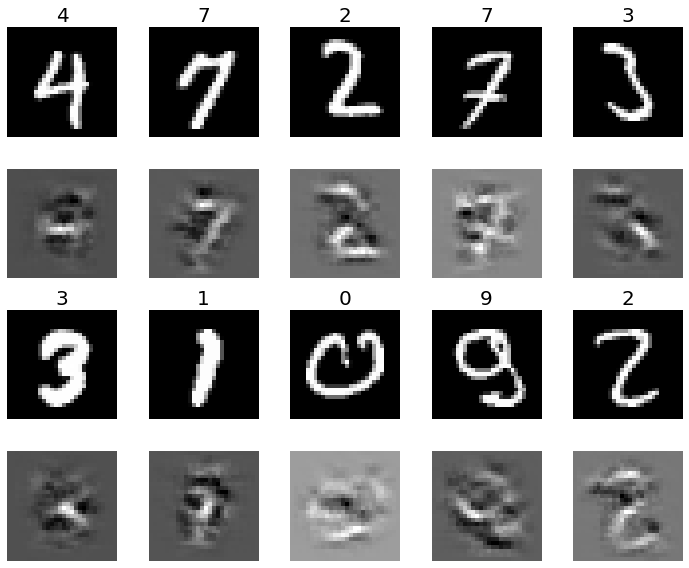

In [31]:
row_num = 2
col_num = 5

# index of image to visualize
random_indices = random.sample(range(len(dataset)), k=row_num*col_num)

fig = plt.figure(figsize=(10,8))

for i in range(row_num):
    for j in range(col_num):
        index = i * col_num + j
        image = dataset.data[random_indices[index]]         # 28x28 array
        target = dataset.targets[random_indices[index]]     # 1x1 tensor

        image = image[None, None].type('torch.FloatTensor')
        # image = image.float().unsqueeze(0)
        image = Variable(image, requires_grad=True)

        VBP = VanillaBackprop(net)
        grads = VBP.generate_gradients(image, target)   # 28x28 array

        # turn off autograd and convert tensor to numpy array
        image = image.detach().numpy()

        # remove redundant dimensions
        image = image.squeeze()
        grads = grads.squeeze()
        
        ax1 = fig.add_subplot(row_num*2, col_num, 2*i*col_num+j+1)
        ax1.imshow(image, cmap='gray')
        ax1.axis('off')
        ax1.set_title(str(target.item()), fontsize=20)
        
        ax2 = fig.add_subplot(row_num*2, col_num, (2*i+1)*col_num+j+1)
        ax2.imshow(grads, cmap='gray')
        ax2.axis('off')

plt.tight_layout()
plt.show()

### grad*input

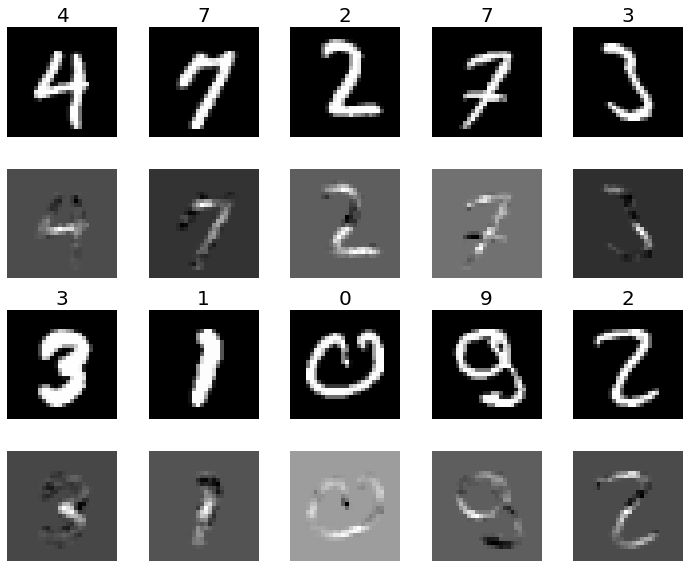

In [32]:
fig = plt.figure(figsize=(10,8))

for i in range(row_num):
    for j in range(col_num):
        index = i * col_num + j
        image = dataset.data[random_indices[index]]         # 28x28 array
        target = dataset.targets[random_indices[index]]     # 1x1 tensor

        image = image[None, None].type('torch.FloatTensor')
        # image = image.float().unsqueeze(0)
        image = Variable(image, requires_grad=True)

        VBP = VanillaBackprop(net)
        grads = VBP.generate_gradients(image, target)   # 28x28 array

        # turn off autograd and convert tensor to numpy array
        image = image.detach().numpy()
        
        grads = np.multiply(grads, image)

        # remove redundant dimensions
        image = image.squeeze()
        grads = grads.squeeze()
        
        ax1 = fig.add_subplot(row_num*2, col_num, 2*i*col_num+j+1)
        ax1.imshow(image, cmap='gray')
        ax1.axis('off')
        ax1.set_title(str(target.item()), fontsize=20)
        
        ax2 = fig.add_subplot(row_num*2, col_num, (2*i+1)*col_num+j+1)
        ax2.imshow(grads, cmap='gray')
        ax2.axis('off')

plt.tight_layout()
plt.show()